**Universidad de los Andes** — Facultad de Ingeniería

Autores: **Andrés Vega**, **David Méndez-Acuña**

## **Reinforced Logo**

Ejemplo simple cargando qtables preentrenadas (El proyecto completo se encuentra en `documento.ipynb`)

In [4]:
%run environment.ipynb
%run agent.ipynb
%run rewards.ipynb
%run logo.ipynb

import time

def train(rewards_system):
    '''
    Este método entrena a Logo a partir del sistema de recompensas que entra por parámetro. 
    El resultado de este método corresponde a un objeto de la clase 'Agente' por cada
    uno de los trazos contenidos en el sistema de recompensas. Luego del entrenamiento para cada
    trazo, este método imprime la tabla de q-valores así como una gráfica que muestra la convergencia
    de dicha tabla. 

    Entradas:
    ----------------
    - rewards_system -> array(str[][]): Sistema de recompensas que debe usarse para entrenar a Logo. 
      Se trata de un arreglo de matrices de strings. Se tienen tantas matrices como trazos en la
      figura que se quiere dibujar. Cada matriz tiene una recompensa positiva +1 (el objetivo) y un 
      punto de inicio S. No hay recompensas negativas.

    Salidas:
    ----------------
    - agents: array(Agent): Información necesaria para que Logo pueda dibujar. 
      Se trata de un arreglo de objetos de la clase Agente. Dicha clase contiene las matrices de q-valores
      que se usa para inferir la política óptima que Logo debe seguir durante el dibujo. 
    '''

    agents = []
    trace_index = 1
    for board in rewards_system:
        print(f'\nEntrenamiento para el trazo no. {trace_index} \n')
        environment = Environment(board)
        agent = Agent(environment, gamma=0.5, alpha=0.1, epsilon=0.9, episodes=2000)
        # stats, duration = agent.run()
        agent.load_qtable(trace_index)
        actions, values = agent.actions_values()
        print(f'- Matriz de q-valores y política óptima')
        environment.plot_action(actions, values)
        agents += [agent, ]
        trace_index += 1
    return agents


#### **Entrenamiento para dibujar un cuadrado**

Se quiere enseñarle a Logo a dibujar un cuadrado. Para eso, invocamos el método desarrollado anteriormente. El resultado de esta primera fase de entrenamiento se guarda en la variable `square_agents` que se usará más adelante para que Logo dibuje.


Entrenamiento para el trazo no. 1 

- Matriz de q-valores y política óptima


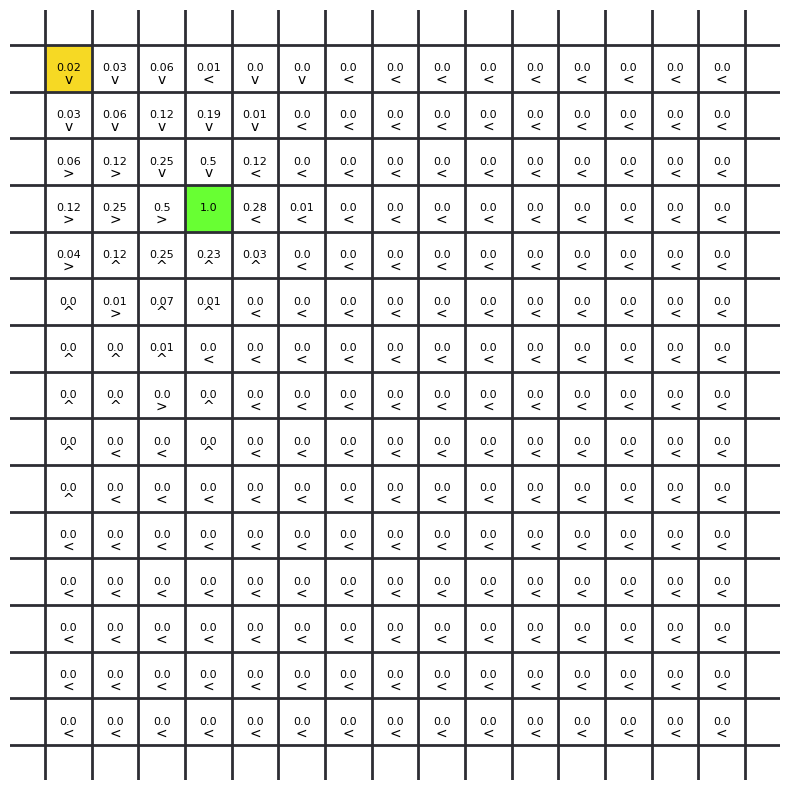


Entrenamiento para el trazo no. 2 

- Matriz de q-valores y política óptima


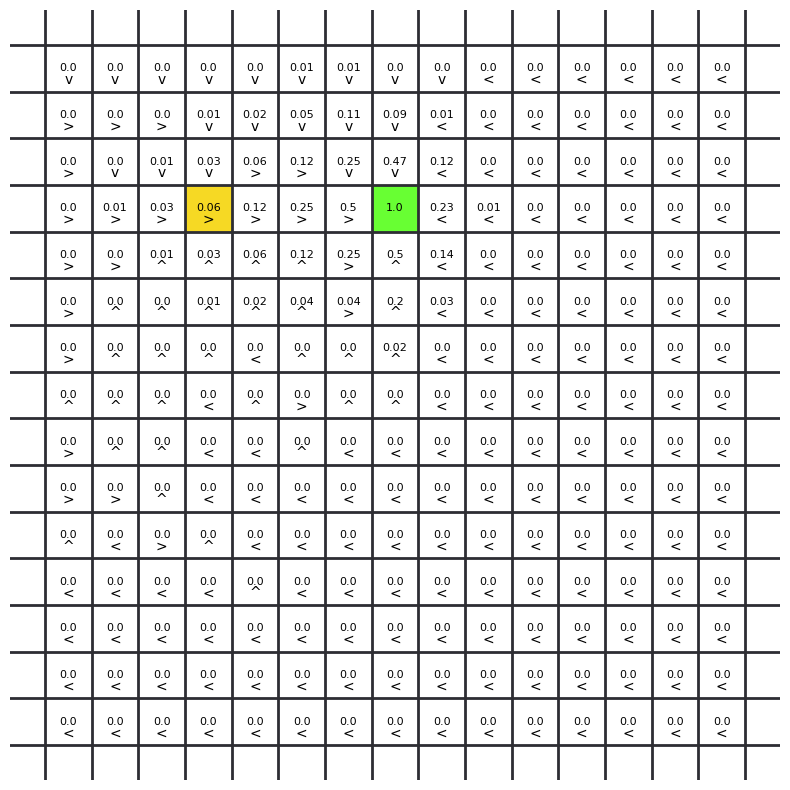


Entrenamiento para el trazo no. 3 

- Matriz de q-valores y política óptima


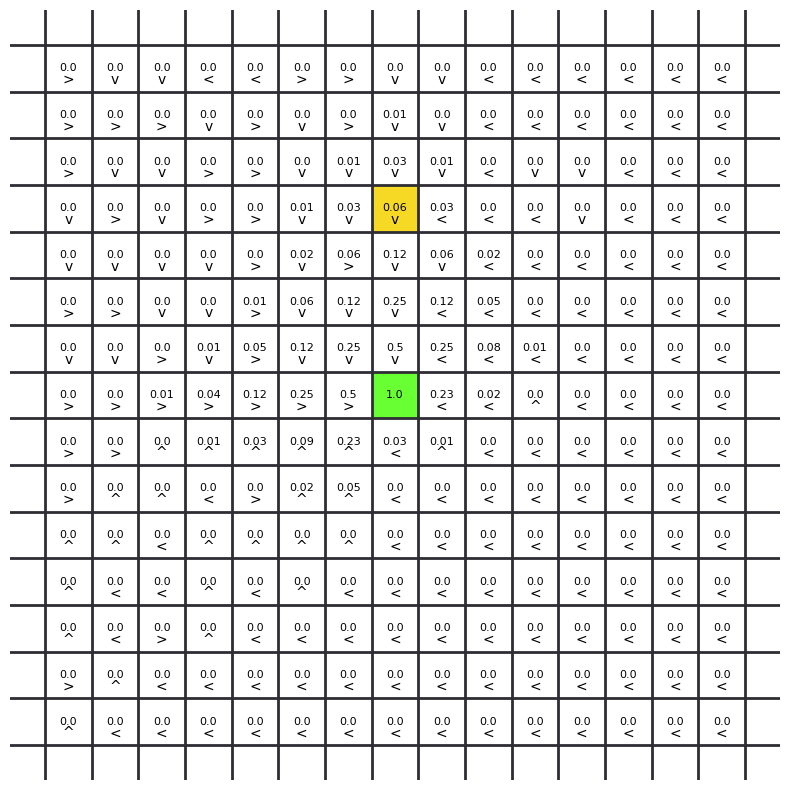


Entrenamiento para el trazo no. 4 

- Matriz de q-valores y política óptima


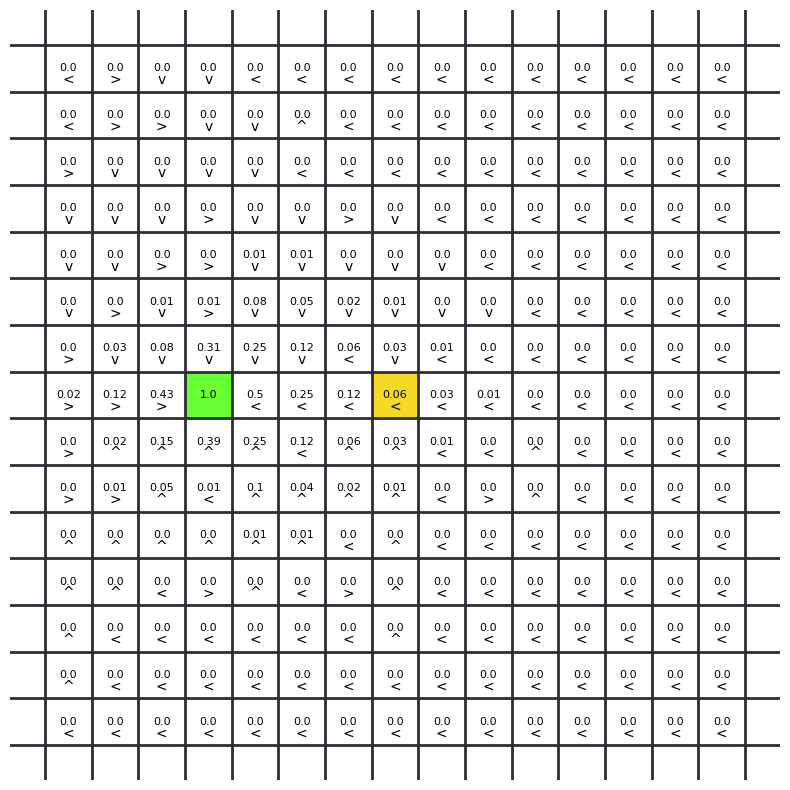


Entrenamiento para el trazo no. 5 

- Matriz de q-valores y política óptima


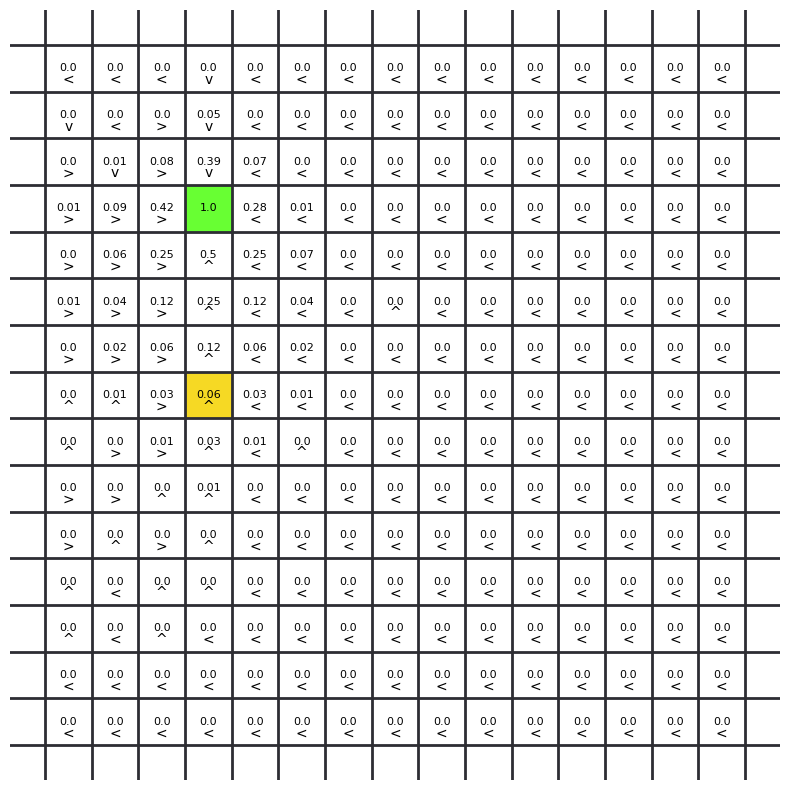

In [5]:
rewards_system = Rewards().square(size=Size.L)
square_agents = train(rewards_system)

### **Fase de dibujo**

A continuación presentamos el código correspondiente a la fase de dibujo de Logo.

#### **Entrenamiento para dibujar un cuadrado**

Ahora que Logo está entrenado para dibujar un cuadrado, podemos usar la matriz de q-valores y su política correspondiente para guiar a Logo durante su dibujo. El código para ello se encuentra a continuación.

In [6]:
logo = Logo(step_size=15, pencolor='yellow')
logo.go_to((-5, -10))

initial_trace = True
for agent in square_agents:
    if initial_trace:
        logo._turtle.penup()
    else:
        logo._turtle.pendown()
    logo.draw(agent=agent)
    initial_trace = False

Inicio un trazo en el estado: (0, 0)
Inicio un trazo en el estado: (3, 3)
Inicio un trazo en el estado: (3, 7)
Inicio un trazo en el estado: (7, 7)
Inicio un trazo en el estado: (7, 3)


### **Resultado**

El resultado de la ejecución del presente notebook se ilustra en la siguiente figura: 

<br>
<center>
    <img src="https://raw.githubusercontent.com/Sulfur0/turtle-drawing/master/entregable/square_logo.png" width="300">
</center>
<center>
Figura 2. Resultado de la ejecución.
</center>